<a href="https://colab.research.google.com/github/MJKhadeeja/ML-python-Mini-projects/blob/ML-Classification/Mobile_Prediction(Mini_project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Importing Libraries***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

## ***Importing Data set***

### **This data set contains some of the informations about the mobile phone like battery_power, blue, clock_speed, dual_sim, fc, four_g, int_memory, m_dep,	mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time, three_g, touch_screen, wifi from which we can predict the catogory of mobile based on its price(economical/high price)**


In [ ]:
#from google.colab import files
#files.upload()

Saving Mobile prediction.csv to Mobile prediction.csv


{'Mobile prediction.csv': b'battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range\n842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1\n1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2\n563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2\n615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2\n1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1\n1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0,1\n1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3\n1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1,0\n1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0,0\n509,1,0.6,1,2,1,9,0.1,93,5,15,1137,1224,513,19,10,12,1,0,0,0\n769,1,2.9,1,0,0,9,0.1,182,5,1,248,874,3946,5,2,7,0,0,0,3\n1520,1,2.2,0,5,1,33,0.5,177,8,18,151,1005,3826,14,9,13,1,1,1,3\n1815,0,2.8,0,2,0,33,0.6,159,4,17,607,748,1482,18,0,2,1,0

### ***Data Processing***

In [ ]:
mobile_data=pd.read_csv("Mobile prediction.csv")
mobile_data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [ ]:
mobile_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
mobile_data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [ ]:
mobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
mobile_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
mobile_data.shape

(2000, 21)

In [ ]:
mobile_data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

### *Data Visualizing*

**CountPlot of Mobile Price range(Price_range=0,1 -> Economical price and Price_range=2,3 -> High Price)**

<Axes: xlabel='price_range', ylabel='count'>

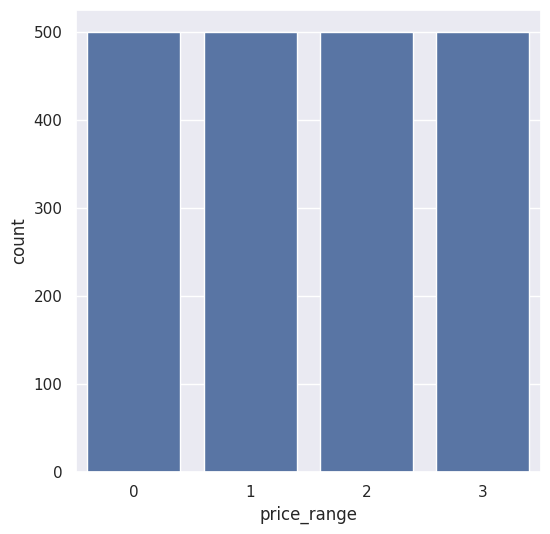

In [ ]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='price_range',data=mobile_data)

**Distribution** plot of "Distribution of RAM"

<Figure size 600x600 with 0 Axes>

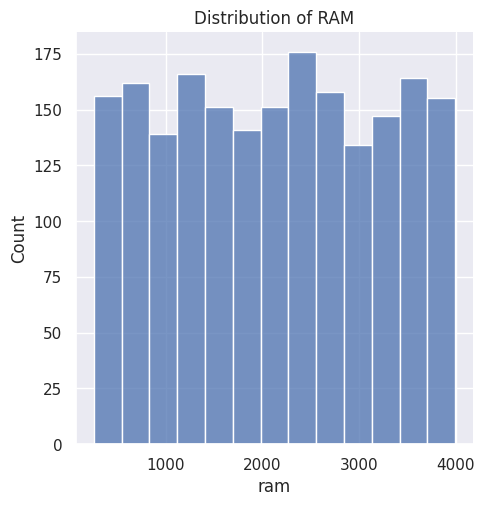

In [ ]:
plt.figure(figsize=(6,6))
sns.displot(mobile_data['ram'])
plt.title('Distribution of RAM')
plt.show()

**Bar** plot of 'Price range' v/s 'internal memory'


<Axes: xlabel='price_range', ylabel='int_memory'>

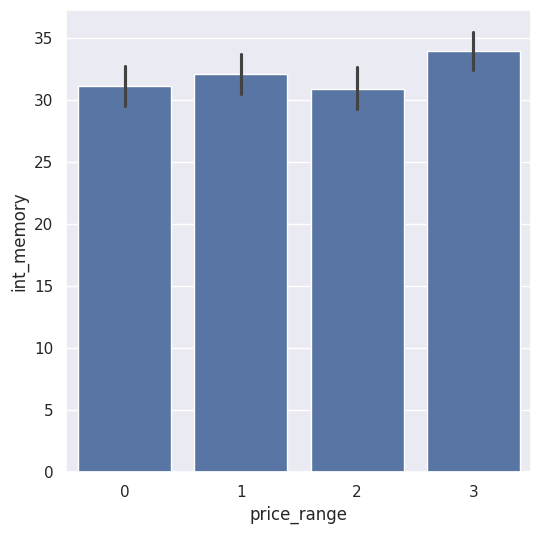

In [ ]:
plt.figure(figsize=(6,6))
sns.barplot(x='price_range',y='int_memory',data=mobile_data)

**Histogram** of 'Weight of the mobiles'

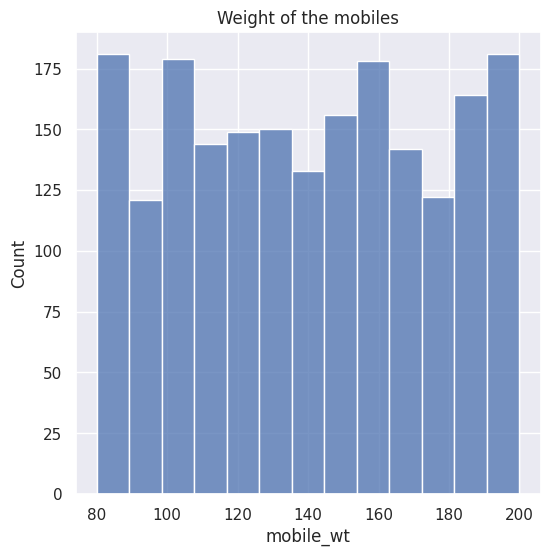

In [ ]:
plt.figure(figsize=(6,6))
sns.histplot(mobile_data['mobile_wt'])
plt.title('Weight of the mobiles')
plt.show()

**Heat** Map of the data

In [ ]:
correlation=mobile_data.corr()

<Axes: >

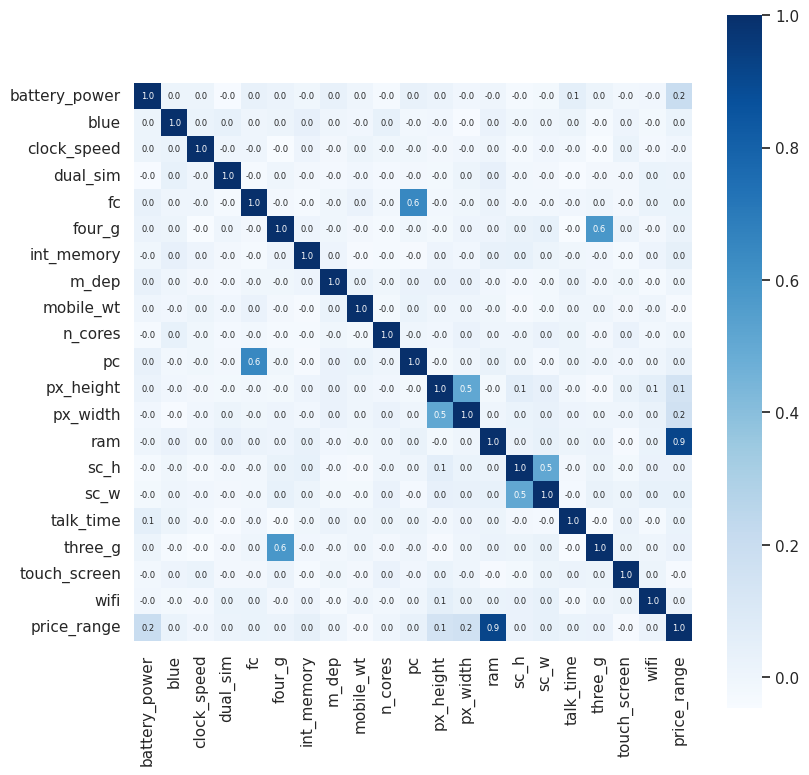

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':6},cmap='Blues')

### **Splitting** the data as features and target


In [ ]:
x=mobile_data.drop('price_range',axis=1)
y=mobile_data['price_range']

In [ ]:
print(x)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
0       0

In [ ]:
print(y)

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64


### ***Splitting the data as Train data and Test data***

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=1)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(2000, 20) (1600, 20) (400, 20)


In [ ]:
print(x_train)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1302           1928     0          2.6         0   5       0           5   
146            1101     0          1.8         0   0       0          31   
1130           1975     1          1.9         1   2       0          31   
1485            742     1          2.3         0   0       0          21   
1905           1027     1          0.8         0   7       0          18   
...             ...   ...          ...       ...  ..     ...         ...   
1104            989     1          1.8         1   4       1          55   
1696           1890     0          1.1         0   4       1          48   
1872           1745     0          2.9         0   0       1           3   
428            1197     0          1.3         0   3       1          20   
945             832     0          1.1         0   0       1          46   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
1302    0

In [ ]:
print(y_train)

1302    0
146     1
1130    3
1485    0
1905    0
       ..
1104    1
1696    3
1872    1
428     1
945     3
Name: price_range, Length: 1600, dtype: int64


### ***Model training***

In [ ]:
model1=LogisticRegression()
model1.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### ***Model Evaluation***

In [ ]:
x_train_prediction1=model1.predict(x_train)
train_data_accuracy1=accuracy_score(y_train,x_train_prediction1)

In [ ]:
print('The train data accuracy in Logistic Regression is',train_data_accuracy1)

The train data accuracy in Logistic Regression is 0.64625


In [ ]:
x_test_prediction1=model1.predict(x_test)
test_data_accuracy1=accuracy_score(y_test,x_test_prediction1)

In [ ]:
print('The test data accuracy in Logistic Regression is',test_data_accuracy1)

The test data accuracy in Logistic Regression is 0.5975


### ***Predicting***

In [ ]:
battery_power=int(input("enter battery power:"))
blue=int(input("enter blue:"))
clock_speed=float(input("enter clock_speed:"))
dual_sim=int(input("enter dual sim or not:"))
fc=int(input("enter fc:"))
four_g=int(input("enter four_g:"))
int_memory=int(input("enter int_memory:"))
m_dep=float(input("enter m_dep:"))
mobile_wt=int(input("mobile weight:"))
n_cores=int(input("enter n_cores:"))
pc=int(input("enter pc:"))
px_height=int(input("enter px_height:"))
px_width=int(input("px width:"))
ram=int(input("enter ram:"))
sc_h=int(input("enter sc_h:"))
sc_w=int(input("enter sc_w:"))
talk_time=int(input("enter talk time:"))
three_g=int(input("enter three_g:"))
touch_screen=int(input('enter touch screen activity:'))
wifi=int(input("enter wifi:"))

enter battery power:15
enter blue:0
enter clock_speed:19
enter dual sim or not:74
enter fc:269
enter four_g:154
enter int_memory:5
enter m_dep:19
mobile weight:136
enter n_cores:187
enter pc:1596
enter px_height:254
px width:1587
enter ram:9587
enter sc_h:158
enter sc_w:145
enter talk time:857
enter three_g:598
enter touch screen activity:1
enter wifi:0


In [ ]:
user_data = [battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi]
user_data_array = np.array(user_data).reshape(1, 20)
prediction=model1.predict(user_data_array)
print(prediction[0])
if(prediction[0]==0,1):
  print('The price is economical to everyone')
else:
  print('The price is too high')


2
The price is economical to everyone


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### **This data predicts the price of the mobile as Economical to everyone**